<a href="https://colab.research.google.com/github/nish700/padai/blob/master/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
from mpl_toolkits import mplot3d

$S_{w,b}(x)= \frac{1}{1 + e^{-(wx + b)}} $

In [0]:
def sigmoid(x,w,b):
  return 1/(1 + np.exp(-(w*x + b)))
## np.exp --> denote exponential in maths form

In [33]:
sigmoid(1,2,0)

0.8807970779778823

In [0]:
w = 1  #@param {type: "slider", min: -5, max: 5}
b = 0.5     #@param {type: "slider", min: -50, max: 50}
X = np.linspace(-10,10,100) # gives regularly spaced values between the interval
Y = sigmoid(w,X,b) # calling the sigmoid function for every element in X

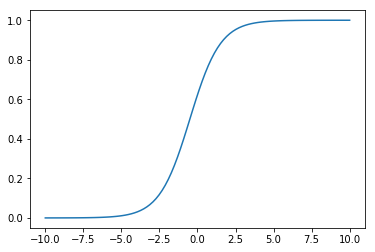

In [35]:
plt.plot(X,Y)
plt.show()

In [36]:
type(Y), type(X)

(numpy.ndarray, numpy.ndarray)

$ S_{w_1,w_2,b} (x1, x2)= \frac{1}{1 + e^-(w_1x_1 + w_2x_2+b)}$

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+ np.exp(-(w1*x1 + w2*x2 +b)))

In [38]:
sigmoid_2d(2,0,1,0,0)

0.8807970779778823

In [39]:
X1= np.linspace(-10,10,100)
X2= np.linspace(-10,10,80)

XX1 , XX2 = np.meshgrid(X1,X2)

print(XX1.shape, XX2.shape, X1.shape, X2.shape)

(80, 100) (80, 100) (100,) (80,)


In [40]:
w1=-2
w2=0.5
b= 0

Y = sigmoid_2d(XX1, XX2,w1,w2,b)
print(type(Y))

#increasing w means sigmoid becomes sharper and transitions faster

<class 'numpy.ndarray'>


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow",'green'])

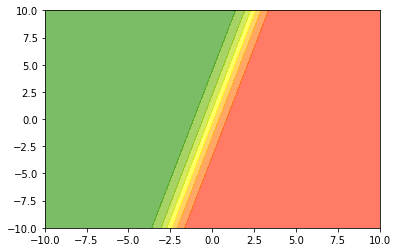

In [42]:
plt.contourf( XX1, XX2, Y, cmap=my_cmap, alpha =0.6)
plt.show()
# aplha increases transperancy

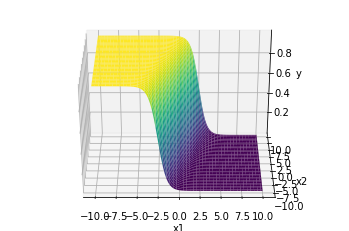

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis') #cmap=binary
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

ax.view_init(30, 270)

##plot between Inputs(X1,X2) and Output(Y)

#Compute loss for a given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.5

X = np.random.random(25) * 20 - 10
Y = sigmoid(X,w_unknown,b_unknown)

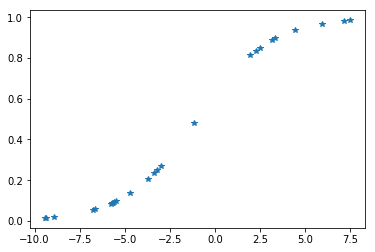

In [45]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y, w_est, b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(x,w_est,b_est))**2
   
  return loss

In [0]:
W = np.linspace(0,2,101) # need to identify the range of W
B = np.linspace(-1,1,101) # change the limits to refine the search space

WW, BB = np.meshgrid(W,B)

# Loss should be an array of the same size as WW
Loss = np.zeros(WW.shape)

In [0]:
# iterate through all the values of meshgrid and calculate the loss for each of the values
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])
    
    

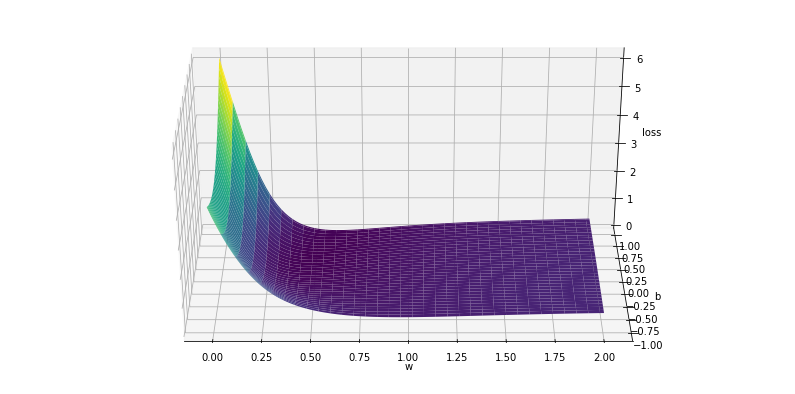

In [49]:
fig = plt.figure(figsize=(14,7))
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis') #cmap=binary
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss');

ax.view_init(30, 270)

## plot between parameters(W,B) and LOSS for the different parameters

find W & B which minimizes loss

In [50]:
# to find the location of minimum loss
ij = np.argmin(Loss) 
i = int(np.floor(ij/Loss.shape[0]))
#j = int(ij - i * Loss.shape[1])
j = int(np.floor(ij%Loss.shape[0]))
print(ij,i,j)

7600 75 25


In [51]:
print(WW[i,j],BB[i,j])

0.5 0.5


# Class for Sigmoid Neuron

In [0]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.b = None
    self.w = None
    
  def perceptron(self,x):
    return np.dot(x,self.w.T) + self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred -y)* y_pred * (1- y_pred) * x
  
  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1- y_pred)
  
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    
    return np.array(Y_pred)
  
  def fit(self,X,Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    #initialize w and b
    if initialise:
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0
    
   # wt_matrix=[]
    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      dw = 0
      db = 0
      
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
        
      self.w = self.w - learning_rate * dw # w-= learning_rate * dw
      self.b = self.b - learning_rate * db # b-= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        #print(Y_pred,Y,'hi')
        loss[i] = mean_squared_error(Y_pred, Y)
    #  wt_matrix.append(self.w)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
    #print(loss)
      
   # return np.array(loss)
    #return np.array(wt_matrix)      
      
  

#Fit for toy data

In [0]:
sns = SigmoidNeuron()

In [0]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]

In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  
  XX1, XX2= np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  #iterate through the linear spaces
  for i in range(X2.size): # ordering matters, do X2 first then X1
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i,j] = sns.sigmoid(sns.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)# ax is the handler
  ax.scatter(X[:,0],X[:,1],c=Y, cmap=my_cmap)
  ax.plot()


[[ 1.36127712 -0.15139426]] [0.11840596]



[[ 1.25934317 -0.84491503]] [-0.02254188]



[[ 1.66065658 -0.17311714]] [-0.11492649]



[[ 1.53611476 -0.89403739]] [-0.25031893]



[[ 1.87735038 -0.29567878]] [-0.35155077]



[[ 1.76565784 -0.90605886]] [-0.47126742]



[[ 2.00033026 -0.49052379]] [-0.5458718]



[[ 1.9629278  -0.72525575]] [-0.59830674]



[[ 2.01125819 -0.66537551]] [-0.62223947]



[[ 2.03098601 -0.67521222]] [-0.64407785]



[[ 2.05084321 -0.68146417]] [-0.66446434]



[[ 2.06977953 -0.68743839]] [-0.68366302]



[[ 2.08788242 -0.69314998]] [-0.7017936]



[[ 2.10522444 -0.69862153]] [-0.71895951]



[[ 2.12186886 -0.70387312]] [-0.73525037]



[[ 2.13787128 -0.7089224 ]] [-0.75074433]



[[ 2.15328082 -0.71378498]] [-0.76550987]



[[ 2.16814111 -0.7184747 ]] [-0.77960733]



[[ 2.18249105 -0.72300388]] [-0.79309009]



[[ 2.1963655  -0.72738357]] [-0.8060056]



[[ 2.20979583 -0.73162371]] [-0.81839622]



[[ 2.22281036 -0.73573324]] [-0.83029988]



[[ 2.23543472 -0.73972027]] [-0.84175069]



[[ 2.24769223 -0.74359217]] [-0.85277941]



[[ 2.25960415 -0.74735563]] [-0.86341389]



[[ 2.27118992 -0.7510168 ]] [-0.87367937]



[[ 2.28246733 -0.75458128]] [-0.88359886]



[[ 2.29345278 -0.75805424]] [-0.89319332]



[[ 2.30416133 -0.76144041]] [-0.90248195]



[[ 2.31460693 -0.76474419]] [-0.91148232]



[[ 2.32480245 -0.76796962]] [-0.92021061]



[[ 2.33475984 -0.77112047]] [-0.92868171]



[[ 2.34449021 -0.7742002 ]] [-0.93690933]



[[ 2.35400388 -0.77721208]] [-0.94490619]



[[ 2.3633105  -0.78015913]] [-0.95268404]



[[ 2.37241904 -0.78304415]] [-0.9602538]



[[ 2.38133793 -0.7858698 ]] [-0.9676256]



[[ 2.39007505 -0.78863854]] [-0.97480888]



[[ 2.39863779 -0.7913527 ]] [-0.98181246]



[[ 2.4070331  -0.79401443]] [-0.98864454]



[[ 2.41526751 -0.7966258 ]] [-0.9953128]



[[ 2.42334717 -0.79918873]] [-1.00182446]



[[ 2.43127788 -0.80170503]] [-1.00818624]



[[ 2.43906514 -0.80417641]] [-1.01440447]



[[ 2.4467141  -0.80660451]] [-1.02048512]



[[ 2.45422967 -0.80899084]] [-1.02643377]



[[ 2.4616165  -0.81133686]] [-1.03225571]



[[ 2.46887897 -0.81364394]] [-1.0379559]



[[ 2.47602127 -0.81591339]] [-1.04353903]



[[ 2.48304737 -0.81814646]] [-1.04900955]


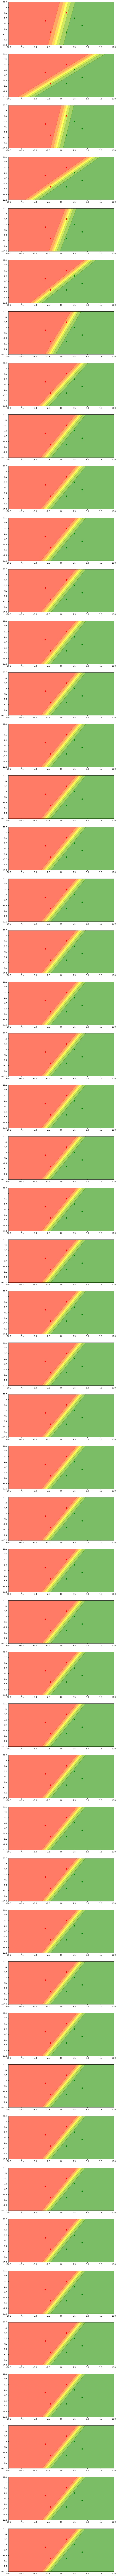

In [57]:
sns.fit(X,Y,1,0.95,True)
N=50
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sns.w,sns.b)  
  ax = plt.subplot(N,1,i+1) # makes a subplot
  plot_sn(X,Y,sns,ax)
  sns.fit(X,Y,1,0.95,False)

In [58]:
'''from matplotlib import animation, rc
from IPython.display import HTML'''

'from matplotlib import animation, rc\nfrom IPython.display import HTML'

In [59]:
# First set up the figure, the axis, and the plot element we want to animate

'''wt_matrix = sns.fit(X,Y,100,0.95,True)
print(wt_matrix.shape)
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-0.5, 0.5))

line, = ax.plot([], [], lw=2)'''

'wt_matrix = sns.fit(X,Y,100,0.95,True)\nprint(wt_matrix.shape)\nfig, ax = plt.subplots()\n\nax.set_xlim(( 0, wt_matrix.shape[1]))\nax.set_ylim((-0.5, 0.5))\n\nline, = ax.plot([], [], lw=2)'

In [60]:
# animation function. This is called sequentially
'''def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)'''

'def animate(i):\n    x = list(range(wt_matrix.shape[1]))\n    y = wt_matrix[i,:]\n    line.set_data(x, y)\n    return (line,)'

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
#anim = animation.FuncAnimation(fig, animate,frames=100, interval=100, blit=True)

In [0]:
#HTML(anim.to_html5_video())

# Working on Real World Examples

In [0]:
data = pd.read_csv('mobile_cleaned1.csv')

In [65]:
data.shape
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [0]:
X = data.drop('Rating',axis=1)
Y = data['Rating']
#Y_binarised = (data['Rating']>=4.1).values.astype(int)

In [67]:
print(X.head())
print(Y.head())

   PhoneId  Pixel Density  Screen Size  Weight  RAM  Processor_frequency  \
0        0            403         6.26     182    4                  1.8   
1        1            271         6.20     168    3                  1.8   
2        2            409         6.30     168    3                  2.1   
3        4            411         6.00     169    4                  2.2   
4        5            396         6.50     175    4                  2.2   

   Screen to Body Ratio (calculated)  Height  Internal Memory  Capacity  \
0                              80.68   157.9               64      4000   
1                              80.85   156.2               32      4230   
2                              83.68   157.0               32      3500   
3                              74.78   159.8               64      3300   
4                              84.23   160.4               64      3750   

    ...     os_name_Other  os_name_Tizen  os_name_iOS  \
0   ...                 0          

In [68]:
print(type(X),type(Y),Y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> (341,)


Train with Real Valued Y but compute accuracy with Binarised Y


In [0]:
data['Class']= (data['Rating']>=4.2).astype(int)

In [70]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating,Class
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,1,0,0,0,1,4.5,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,1,0,0,0,1,4.5,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,1,0,0,0,1,4.4,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,1,0,0,0,0,1,4.3,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,1,0,0,0,1,4.4,1


In [71]:
data['Class'].value_counts(normalize = True)#give percentage numbers

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = data['Class'].values

In [73]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

#Standardisation

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [0]:
R = np.random.random([100,1])

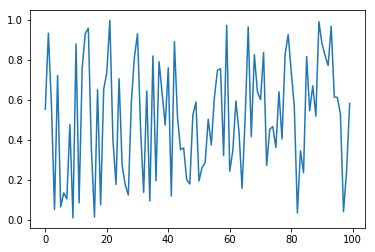

In [76]:
plt.plot(R)
plt.show()

In [77]:
np.mean(R)

0.5109268544190851

In [78]:
np.std(R)

0.281955611744432

In [0]:
scaler = StandardScaler()

In [80]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
scaler.mean_

array([0.51092685])

In [0]:
RT = scaler.transform(R)

In [83]:
np.mean(RT)

-1.4432899320127036e-16

In [84]:
np.std(RT)

1.0

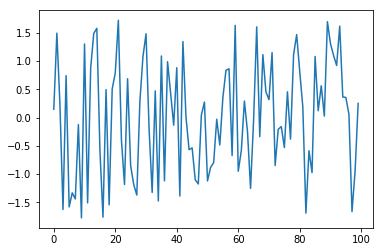

In [85]:
plt.plot(RT)
plt.show()

**Split the data first into Train and Test sets and then standardise. Standardise the train data first and then tranform the test data through it **

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,stratify=Y_binarised)
#random_state - makes the same split between X_train x_test y_train and y_test
#stratify - ensures the number of 1's and 0's in X_train and X_test are roughly the same

In [87]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(255, 87) (86, 87) (255,) (86,)


In [0]:
scaler = StandardScaler()

In [89]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

## fitting the model through the train data and then tranforming it.
##Using the same model to just transform the test data--> no fitting on the test data
## don't transform Y using the same model

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
minmax_scaler = MinMaxScaler()
#minmax scalar used for scaling Y

In [91]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
#fit the Y_train and then tranform using MinMaxScaler

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [92]:
# no need to fit the test data , just transform it
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [93]:
print(Y_scaled_train.shape,Y_scaled_test.shape)

(255, 1) (86, 1)


In [94]:
np.max(Y_scaled_train)
np.min(Y_scaled_train)

0.0

In [0]:
# scaling the threshold value of 4.2 using same minmaxscaler model
threshold = 4.2
scaled_threshold = minmax_scaler.transform(np.array([threshold]).reshape(1,-1))


In [0]:
scaled_threshold = list(scaled_threshold) [0][0]
# getting the scaler value

In [97]:
scaled_threshold

0.6800000000000002

In [98]:
Y_binarised_train = (Y_scaled_train>scaled_threshold).astype('int').ravel()
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [99]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype(int).ravel()
Y_binarised_test
#ravel() flattens out the array 

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

#Train on Real Data

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
sn = SigmoidNeuron()

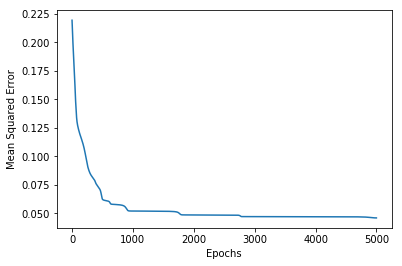

In [102]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=5000, learning_rate=0.0052,display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)
##predict on true scaled data

In [0]:
# binarise the predict values
Y_binarised_pred_train = (Y_pred_train> scaled_threshold).astype('int')
Y_binarised_pred_test = (Y_pred_test> scaled_threshold).astype('int')

In [0]:
##get the accuracy score on binarised data
accuracy_train = accuracy_score(Y_binarised_pred_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_binarised_pred_test, Y_binarised_test)

In [106]:
print(accuracy_train,accuracy_test)

0.8 0.7558139534883721


In [116]:
'''type(Y_pred_train)
Y_pred_train.ravel()
for i in range(Y_pred_train.shape[1]):
  Y_pred_train[i,0]
  Y_pred_test[i,0]
'''

(255, 1)

In [0]:
#print(type(loss),type(accuracy_train))
#plt.plot(loss)
#plt.show()
#for x in loss:
#  print(x)

In [108]:
'''N=50
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sns.w,sns.b)  
  ax = plt.subplot(N,1,i+1) # makes a subplot
plot_sn(X,Y,sns,ax)
  sns.fit(X,Y,1,0.95,False)'''

'N=50\nplt.figure(figsize=(10,N*5))\nfor i in range(N):\n  print(sns.w,sns.b)  \n  ax = plt.subplot(N,1,i+1) # makes a subplot\nplot_sn(X,Y,sns,ax)\n  sns.fit(X,Y,1,0.95,False)'